In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing  import StandardScaler,LabelEncoder
from sklearn.model_selection  import train_test_split
from sklearn.linear_model  import LogisticRegression
from sklearn.metrics  import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

In [76]:
df=pd.read_csv(r'C:\Users\mahcb\Desktop\Project-20250130T084640Z-001\Project\model\dataset\Cellphone.csv')

In [77]:
df.dropna(inplace=True)


In [78]:
df.head()


,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [79]:
df.drop(columns=['Product_id','Sale'],inplace=True,axis=1)
df.head(2)


,Price,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,2357,135.0,5.2,424,8,1.35,16.0,3.0,13.00,8.0,2610,7.4
1,1749,125.0,4.0,233,2,1.30,4.0,1.0,3.15,0.0,1700,9.9


In [80]:
df.isnull().sum()

Price           0
weight          0
resoloution     0
ppi             0
cpu core        0
cpu freq        0
internal mem    0
ram             0
RearCam         0
Front_Cam       0
battery         0
thickness       0
dtype: int64

In [81]:
price=df['Price']
df.drop(columns=['Price'],axis=1,inplace=True)
df['Price']=price

C:\Users\mahcb\AppData\Local\Temp\ipykernel_6496\1877455816.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cpu core',y='Price', data=data,palette='BuPu', orient='h')


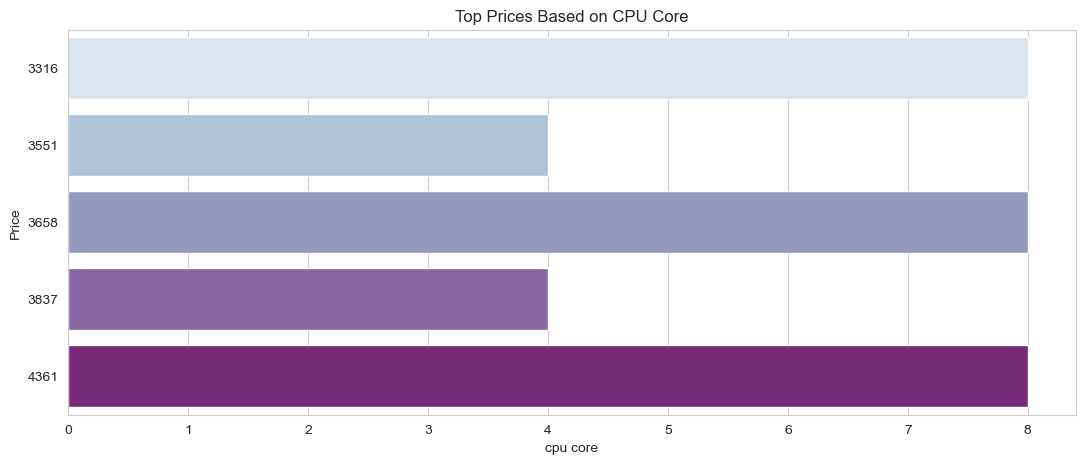

In [82]:
data=df.nlargest(10,'Price').sort_values('Price',ascending=True)
sns.set_style('whitegrid')
plt.figure(figsize=(13,5))
plt.title('Top Prices Based on CPU Core')
sns.barplot(x='cpu core',y='Price', data=data,palette='BuPu', orient='h')

plt.show()

In [83]:
df.head()


,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness,Price
0,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4,2357
1,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9,1749
2,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6,1916
3,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0,1315
4,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9,1749


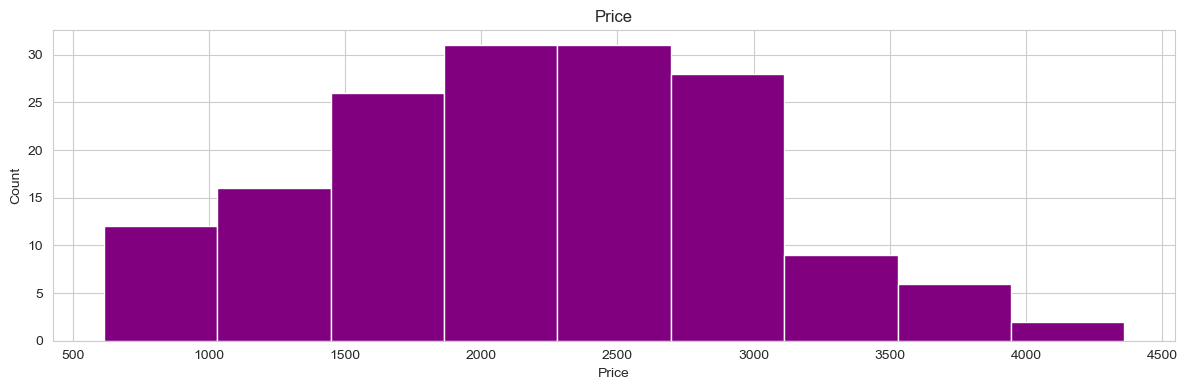

In [84]:
fig,axes=plt.subplots(1,1,figsize=(12,4))

axes.hist(df['Price'],bins=9,edgecolor='white',color='purple')
axes.set_title('Price')
axes.set_xlabel('Price')
axes.set_ylabel('Count')
plt.tight_layout()
plt.show()


In [85]:
df.head()

,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness,Price
0,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4,2357
1,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9,1749
2,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6,1916
3,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0,1315
4,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9,1749


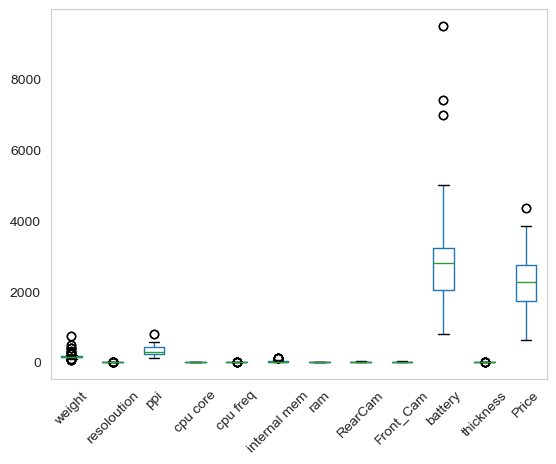

In [86]:
df.boxplot(column=['weight','resoloution','ppi','cpu core'	,'cpu freq'	,'internal mem'	,'ram',	'RearCam'	,'Front_Cam',	'battery',	'thickness','Price'])
plt.grid(False)
plt.xticks(rotation=45)
plt.show()

In [87]:
def outliers(df,column):
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    iqr=q3-q1
    outliers_indices=df[df[column]<q1-1.5*iqr |df[column]>q3+1.5*iqr]
    return outliers_indices

In [88]:
scaler=StandardScaler()
y=df['Price']
x=df.drop('Price',axis=1)
x=scaler.fit_transform(x)

In [89]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=ExtraTreesRegressor()
model.fit(x_train,y_train)

ExtraTreesRegressor()

In [90]:
train_pred=model.predict(x_train)
test_pred=model.predict(x_test)




In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   weight        161 non-null    float64
 1   resoloution   161 non-null    float64
 2   ppi           161 non-null    int64  
 3   cpu core      161 non-null    int64  
 4   cpu freq      161 non-null    float64
 5   internal mem  161 non-null    float64
 6   ram           161 non-null    float64
 7   RearCam       161 non-null    float64
 8   Front_Cam     161 non-null    float64
 9   battery       161 non-null    int64  
 10  thickness     161 non-null    float64
 11  Price         161 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 15.2 KB


In [92]:
mean_squared_error_train=mean_squared_error(y_train,train_pred)
mean_squared_error_test=mean_squared_error(y_test,test_pred)
mean_absolute_error1=mean_absolute_error(y_test,test_pred)
r2_score1=r2_score(y_test,test_pred)
print(mean_squared_error_train)
print(mean_squared_error_test)
print(mean_absolute_error1)
print(r2_score1)

0.0
5318.365724242429
33.29363636363639
0.9906183301493777


In [93]:
joblib.dump(scaler,'scaler.pkl')
joblib.dump(model,'model.pkl')


['model.pkl']